# Dyslexia Homework Assistant Pipeline

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Step 1: Image processing
Watch this tutorial to learn more https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html

# Step 2: OCR
We can use pytesseract, a python binding of the open source Tesseract engine https://github.com/madmaze/pytesseract (from https://tesseract-ocr.github.io/). 
<br>On windows, you can use this installer https://github.com/UB-Mannheim/tesseract/wiki

In [2]:
from PIL import Image
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
pytesseract.get_tesseract_version()

LooseVersion ('5.0.0-alpha.20200328')

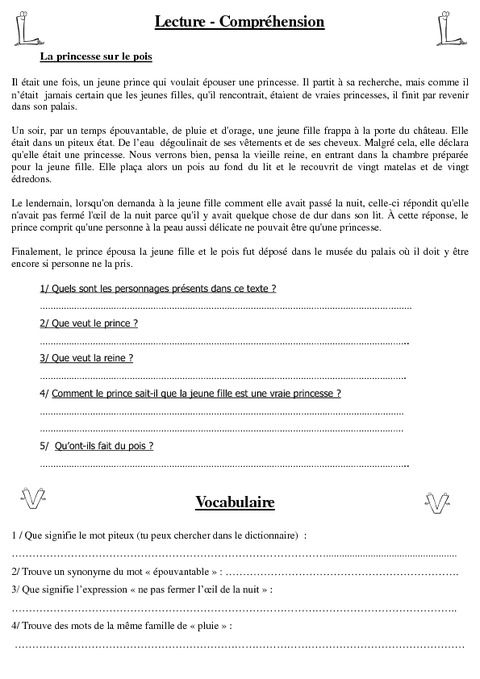

In [3]:
Image.open("data/exercises/exercise1.jpg")

In [4]:
# French text image to string
print(pytesseract.image_to_string(Image.open('data/exercises/exercise1.jpg'), lang='fra'))

ÎL Lecture - Compréhension ÎL.

La princesse sur le pois

11 ait une foi un jeune prince qu voulait épouner une princesse part à sa recherche, mais comme il
n'étit jamais can que les jeune flls, qu'il rencontra, étaient de vraies princesses, Fit par revenir
dans son polis

{Un soir, par un temps épouvantable, de pluie et d'orage, une jeune ll appa à La porte du château. Elle
ét dans un piteux dat D l'eau dégoalinai de ses vêtements et de ses cheveux. Malgré cela elle déclara
quelle ét une princesse. Nous vertons bien, pensa a vieille rene, en entrant dans Là chambre puéparée
pour La jeune file. Elle pags alors un pois au Fond du Ft et le mcouvrit de vingt matelas et de Vnge
dredons

Le lendemain, lorqu'on demanda à 1 jeune File comment ele avait pasé a ui, celle-ci répondit que
n'avait pas fermé Fil de 1 nuit parce qu'il y avait quelque chose de dur dans son Bt. À cette répunse, ke
Prince comp qu'une personne à a peau aussi délicat ne pouvait être qu'une princesse

Finalement le pince 

In [5]:
# French text image to string
print(pytesseract.image_to_string(Image.open('data/exercises/exercise2.jpg'), lang='fra'))

Rafael Nadal
Rafael Nadal est un grand joueur de tennis. Il est espagnol. Son père s'appelle Sébastian et
sa mère s'appelle Ana Maria. Il a une sœur. Elle s'appelle Maria Isabel. Son coach s'appelle
Toni Nadal.
Nadal est né le 3 juin 1986 à Manacor, en Espagne. Il habite dans cette ville

   
   

avec sa famille parce qu'il aime bien sa ville natale. Il est grand. Il mesure 1m
80cm. Il n'est pas gros et il pèse 85 kilos. Il a les cheveux bruns etila €
les yeux marron. Il est sociable, studieux, courageux et sportif. Il fait
du tennis depuis l'âge de 4 ans. Il adore le tennis. Il aime aussi le
football et le basketball. Il fait toujours du football et du basketball
avec ses amis et ses cousins. Les matins, il aime faire de la course à pied
et de la natation. Il adore nager. Il n'aime pas l'équitation. En été, quand il
n'a pas de tournoi, il fait souvent de l'escalade avec ses amis.

Nadal aime aussi les animaux mais il n'a pas d'animal chez lui. Son animal préféré est le
léopard. Il ai

In [6]:
def scan_image(image_path):
    return pytesseract.image_to_string(Image.open(image_path), lang='fra')

# Step 3: Hyphenation

In [8]:
sample_text = """ L'apparition du vif ne fait qu'une avec celle de la vie organisée, à la fois parce que la vie ne peut surgir du chaos qu'en apportant en quelque sorte une plus-value de consistance à un ensemble dilapidé de forces et de matériaux ; et à la fois parce que l'énergie nécessaire à cette consistance, l'énergie qui va opérer les densifications, les articulations et assurer le lien, l'énergie qui va tout aussi bien enfler les vides, des fentes, truffer la matière, intercaler les forces, aménager les intervalles qui aèrent et donc cohèrent le vivant, cette énergie ne peut venir que d'une force terrible, aussi ténue soit-elle, qui est le vif."""
sample_text

" L'apparition du vif ne fait qu'une avec celle de la vie organisée, à la fois parce que la vie ne peut surgir du chaos qu'en apportant en quelque sorte une plus-value de consistance à un ensemble dilapidé de forces et de matériaux ; et à la fois parce que l'énergie nécessaire à cette consistance, l'énergie qui va opérer les densifications, les articulations et assurer le lien, l'énergie qui va tout aussi bien enfler les vides, des fentes, truffer la matière, intercaler les forces, aménager les intervalles qui aèrent et donc cohèrent le vivant, cette énergie ne peut venir que d'une force terrible, aussi ténue soit-elle, qui est le vif."

## Tokenization

In [9]:
from nltk.tokenize import wordpunct_tokenize,word_tokenize

In [10]:
sample_tokens = wordpunct_tokenize(sample_text)
sample_tokens[:10]

['L', "'", 'apparition', 'du', 'vif', 'ne', 'fait', 'qu', "'", 'une']

In [11]:
sample_tokens = word_tokenize(sample_text)
sample_tokens[:10]

["L'apparition",
 'du',
 'vif',
 'ne',
 'fait',
 "qu'une",
 'avec',
 'celle',
 'de',
 'la']

## Hyphenation

In [12]:
import pyphen
dic = pyphen.Pyphen(lang='fr')

In [13]:
sample_text2 = "je m'appelle dyslexia, une IA pour aider les enfants dyslexiques à faire leurs devoirs"
dic.inserted(sample_text2)

"je m'ap-pel-le -dys-lexia, u-ne IA -pour ai-der -les en-fants -dys-lexi-ques à -fai-re -leurs -de-voirs"

In [14]:
dic.inserted("anticonstitutionnellement")

'an-ti-cons-ti-tu-tion-nel-le-ment'

In [15]:
def hyphenize_text(text):
    tokens = word_tokenize(text)
    tokens = [dic.inserted(token,hyphen = '|') for token in tokens]
    return tokens

In [16]:
hyphenize_text(sample_text2)

['je',
 "m'ap|pelle",
 'dys|lexia',
 ',',
 'une',
 'IA',
 'pour',
 'ai|der',
 'les',
 'en|fants',
 'dys|lexiques',
 'à',
 'faire',
 'leurs',
 'de|voirs']

# Step 4: Custom dyslexia rendering

Goal: create an html from the hyphenized text with different colors by syllable and using specific dyslexic font

In [17]:
import seaborn as sns
from IPython.display import HTML,display


def make_palette(n,name = "husl",as_hex = True):
    convert_hex = lambda r,g,b : '#%02x%02x%02x' % tuple(map(lambda x : int(x*255),(r,g,b)))
    colors = sns.color_palette(name,n)
    if as_hex:
        colors = [convert_hex(*color) for color in colors]
    return colors

def make_html(text,font = 'Arial Black',font_size = 18,render = True):
    if " " in font:
        font = f"'{font}'"
    html = f"""<p style="font-family:{font};font-size:{font_size}px">{text}</p>"""
    if render:
        return display(HTML(html))
    else:
        return html

In [18]:
def custom_rendering_text(tokens,palette = "colorblind"):
    html = []
    for token in tokens:
        html_token = ""
        syllables = token.split("|")
        if len(syllables) == 1:
            colors = ["#000000"]
        else:
            colors = make_palette(len(syllables),palette)
        for color,syl in zip(colors,syllables):
            html_syl = f"""<span style="color:{color}">{syl}</span>"""
            html_token += html_syl
            
        html.append(html_token)
        
    html = " ".join(html)
    
    return html

def dyslexia_text_pipeline(text,palette = "colorblind",font = "Trebuchet MS",font_size = 18,render = True):
    tokens = hyphenize_text(text)
    html = custom_rendering_text(tokens,palette)
    html = make_html(html,font,font_size,render)
    return html

In [19]:
dyslexia_text_pipeline(sample_text2)

In [20]:
dyslexia_text_pipeline(sample_text)

# Wrapping everything

In [22]:
text = scan_image("data/exercises/exercise2.jpg")
dyslexia_text_pipeline(text)